In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [2]:
health = ctrl.Antecedent(np.arange(0, 101, 1), 'health')
enemies = ctrl.Antecedent(np.arange(0, 11, 1), 'enemies')
winning_prob = ctrl.Consequent(np.arange(0, 101, 1), 'winning_prob')

In [3]:
health.automf(3)
enemies.automf(3)
winning_prob.automf(3)

/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


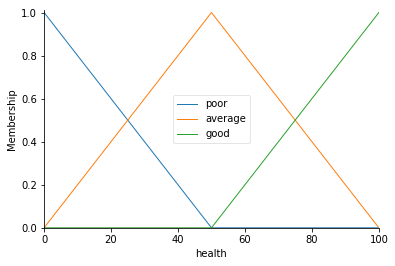

In [4]:
health.view()

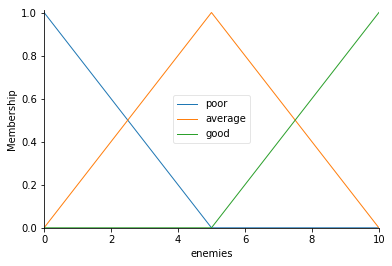

In [5]:
enemies.view()

RULES:
1. health = poor & enemies = high => winning_prob = poor
2. health = high & enemies = high => winning_prob = average
3. health = high & enemies = low  => winning_prob = high
4. health = low & enemies = low => winning_prob = average
5. health = average & enemies = high => winning_prob = poor

In [6]:
rule1 = ctrl.Rule(health['poor'] & enemies['good'], winning_prob['poor'])
rule2 = ctrl.Rule(health['good'] & enemies['good'], winning_prob['average'])
rule3 = ctrl.Rule(health['good'] & enemies['poor'], winning_prob['good'])
rule4 = ctrl.Rule(health['poor'] & enemies['poor'], winning_prob['average'])
rule5 = ctrl.Rule(health['average'] & enemies['good'], winning_prob['poor'])

In [7]:
winning_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

Example 1: health = 30, enemies = 9

probablity of winning = 20.416666666666657


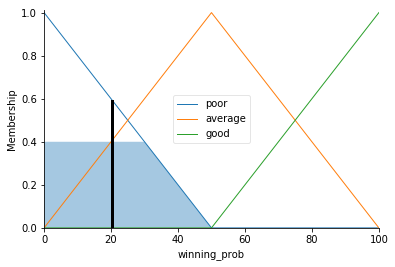

In [8]:
example1 = ctrl.ControlSystemSimulation(winning_ctrl)
example1.input['health'] = 30
example1.input['enemies'] = 9
example1.compute()
print ("probablity of winning = " + str(example1.output['winning_prob']))
winning_prob.view(sim=example1)

Example 1: health = 93, enemies = 1

probablity of winning = 82.77777777777777


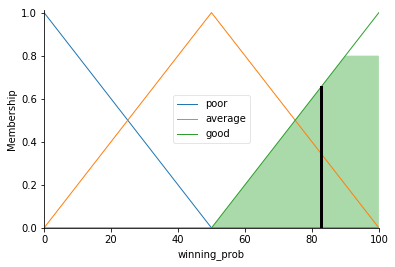

In [9]:
example2 = ctrl.ControlSystemSimulation(winning_ctrl)
example2.input['health'] = 93
example2.input['enemies'] = 1
example2.compute()
print ("probablity of winning = " + str(example2.output['winning_prob']))
winning_prob.view(sim=example2)